<a href="https://colab.research.google.com/github/weprintmoney/LLMPractice/blob/main/10_10_Developing_AI_Assistants_with_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Creating a LangChain Data Science Assistant</center></font></h1>
<h1><center>with the OpenAI API</center></h1>
<h3><center>Charlcye Mitchell, May 2024</center></h3>

## **Learning Notebook Objective**

In this learning notebook, we shall go over the code to understand how to enable the creation of a LangChain agent that can function as a "Data Science Assistant", to help us perform the nature of tasks we have often done in Data Analysis and Data Science. We shall demonstrate the usage of an OpenAI model for the purposes of this notebook (although this can also be accomplished with an open-source model such as Llama 2), and demonstrate how the LLM is able to understand our Natural Language commands, convert those into Pandas code, and execute our commands to get the desired outputs.



## **Installing the required libraries**

In [ ]:
!pip install tiktoken;
!pip install openai==1.7.1;
!pip install pypdf;
!pip install faiss-gpu;
!pip install google-search-results;
!pip install cohere;
!pip install pandas;
!pip install matplotlib;
!pip install seaborn;
!pip install langchain_experimental==0.0.49 langchain==0.1.0 langchain-core==0.1.10;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beha

## **Displaying the OpenAI Library Version**

In [ ]:
!pip3 show openai;

## **Importing the libraries required**

In [ ]:
import os;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent;
from langchain.llms import OpenAI;
from langchain.chat_models import ChatOpenAI;
from langchain.agents.agent_types import AgentType;

## **Utilizing the OpenAI API Key and API Base**

While the subsequent cells in this notebok have already been run using an OpenAI API Key and API Base with outputs visible, these details are currently not provided in the following cell.

You can access your individual OpenAI API Key and API Base URL through the Settings page in the Olympus Great Learning LMS - please refer to the document with instructions provided separately in order to do this.

In [ ]:
API_KEY = '_____';
OPENAI_API_BASE = '_____';

os.environ['OPENAI_API_KEY'] = API_KEY;
os.environ['OPENAI_API_BASE'] = OPENAI_API_BASE;

## **Creating the LLM Instance**

Having provided details to access the OpenAI API, we can now create an LLM instance by using the ChatOpenAI() function and providing a model name - in this case, GPT-4. This LLM is the core of our LangChain agent, and it will be responsible for responding to our user queries (conditional to the additional prompts that LangChain provides it).

In [ ]:
llm = ChatOpenAI(model_name = 'gpt-4');

## **Loading in the dataset**

Like we would always do for a Data Science project, we shall begin by using the read_csv() function to load in our dataset. For our trial in this notebook, we shall be working with the [Pima Indians Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) dataset, a popular open-source Machine Learning dataset that assesses if a person of the Pima tribe origin has diabetes or not, based on a number of health factors.

In [ ]:
df = pd.read_csv('diabetes.csv');

## **Creating the Pandas DataFrame Agent**

The particular type of LangChain agent we shall be working with is a called a Pandas DataFrame agent - this agent is a specific instance of using an LLM such as GPT-4 to analyze a Pandas DataFrame with custom prompts and instructions provided by LangChain to the LLM for that purpose. We shall also set the verbose parameter in the following function to True, so that we can follow the internal thought process behind how the LLM arrives at its answers.

In [ ]:
agent = create_pandas_dataframe_agent(llm = llm, df = df, verbose = True);

## **Query 1: Counting the number of rows**

We can start off with a simple query - let's ask the agent for the number of rows present in this dataset.

In [ ]:
user_message = 'How many rows are there?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: I need to find the number of rows in the dataframe. This can be done using the len() function or the shape attribute of a dataframe.
Action: python_repl_ast
Action Input: len(df)
Observation: 768
Thought:The output of the len() function indicates the number of rows in the dataframe.
Final Answer: There are 768 rows in the dataframe.

> Finished chain.


As we can see from above, **the LLM agent uses a particular framework provided by LangChain (popularly called the ReAct Framework - Reason and Act)**, which forces it to carry out a structured thinking process in order to respond to our query. This is subtly different from interacting directly with an assistant-style LLM with our own query and system prompt - in this scenario, LangChain already has a system prompt in place for its agents that asks the LLM to use the ReAct Framework (with Thoughts, Actions and Observations) to come up with the Final Answer.  

In the example above, the LLM first generates a Thought on how it can find the number of rows in the DataFrame. This is then converted to an Action, the Pandas code that corresponds to the Thought, and that then leads to an Observation (which is the output of that Pandas code). The LLM then again reasons with itself using another Thought, which deduces that this Observation is in fact the final answer it is required to give, and it frames a Final Answer based on that finding.

The number of these Thought - Action - Observation cycles will vary depending on the complexity of the user query - the more complex the query, the higher the number of such cycles required by the LLM agent to give us our final answer, which in a way, mirrors how we humans arrive at answers to questions of varying complexity with our reasoning process as well.

In the following examples, let's ask EDA-style questions of increasing complexity to the LLM.

## **Query 2: Retrieving the number and names of the columns**

In [ ]:
user_message = 'How many different columns are there in the dataset? What are the names of these columns?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: The columns of a dataframe can be accessed using the `columns` attribute. By printing this, I can see the names of all the columns. The number of columns can be determined by counting the number of elements in this list.
Action: python_repl_ast
Action Input: print(df.columns)
Observation: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Thought:The names of the columns are 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'. Now I will count the number of these columns.
Action: python_repl_ast
Action Input: len(df.columns)
Observation: 9
Thought:I now know the final answer.
Final Answer: There are 9 different columns in the dataset. The names of these columns are 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree

## **Query 3: Checking for missing values in the dataset**

In [ ]:
user_message = 'Are there any missing values in the dataset?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: In order to check if there are missing values in the dataframe, I can use the `isnull()` function, which returns a dataframe of the same size as `df` but with `True` in places where the original dataframe had `NaN` and `False` elsewhere. To count the number of `True` values (i.e., the number of missing values) in the entire dataframe, I can use the `sum()` function twice.
Action: python_repl_ast
Action Input: df.isnull().sum().sum()
Observation: 0
Thought:The result is 0, which means there are no missing values in the dataset.
Final Answer: No, there are no missing values in the dataset.

> Finished chain.


## **Query 4: Obtaining the average age of the people in the dataset**

In [ ]:
user_message = 'What is the average Age in the dataset?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: I need to find the average of the "Age" column in the dataframe.
Action: python_repl_ast
Action Input: df['Age'].mean()
Observation: 33.240885416666664
Thought:I now know the average age in the dataset.
Final Answer: The average age in the dataset is approximately 33.24 years.

> Finished chain.


## **Query 5: Displaying a brief summary of the columns**

In [ ]:
user_message = 'Can you display a brief summary of the columns in the dataset for me?'
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: I can use the `df.info()` function to display a brief summary of the columns in the dataset.
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Thought:The dataframe has 9 columns,

## **Query 6: Plotting a Correlation Heatmap**

In this example, we shall ask the agent to plot a correlation heatmap among the columns and comment on the trends observed in terms of which columns seem most strongly correlated with each other. We shall see that the LLM is capable of servicing this more complex request.



> Entering new AgentExecutor chain...
Thought: To plot a correlation heatmap, we first need to find the correlation matrix of the dataframe. We can use the corr() function in pandas to find this. Then we can use seaborn's heatmap function to plot this matrix.

Action: python_repl_ast
Action Input: df.corr()
Observation:                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                         

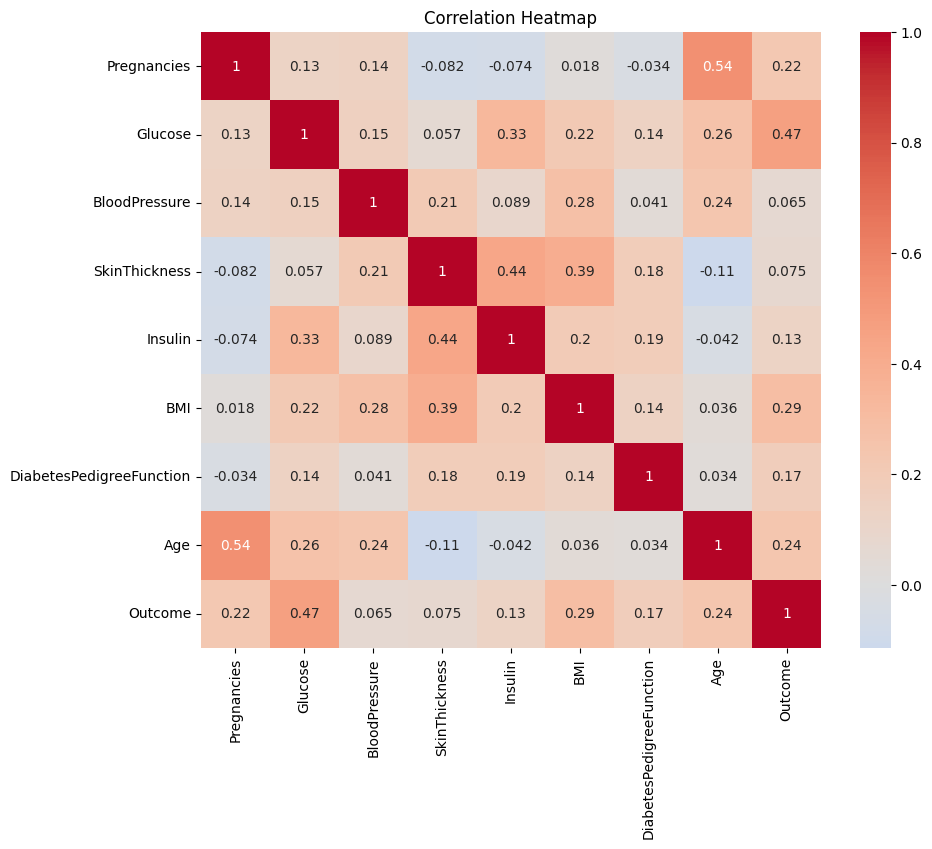


Observation: 
Thought:The seaborn heatmap function should have created a visual representation of the correlation matrix. The color in each cell represents the strength and direction of the correlation between two variables. A darker color means a stronger correlation. The direction is represented as either positive (blue) or negative (red). The diagonal line of the heatmap represents the correlation of a variable with itself, which is always 1. 

Final Answer: From the heatmap, it can be seen that there is a positive correlation between 'Glucose' and 'Outcome', meaning that a higher glucose level could indicate a higher likelihood of diabetes. Also, 'Age' and 'Pregnancies' are positively correlated, indicating that as a woman ages, she is likely to have had more pregnancies. On the other hand, 'SkinThickness' and 'Insulin' have a significant positive correlation. The heatmap aids in understanding the relationship between different variables in the dataset.

> Finished chain.


In [ ]:
user_message = 'Plot a correlation heatmap, showing correlations among all the columns. Label the axes, and comment on the main trends.';
agent.run(user_message);

As we can see from the answer above, the agent correctly surmises a couple of more meaningful pairwise correlations - the Glucose/Outcome pair and the Age/Pregnancies pair. **In addition to just pointing out that these correlations are relatively strong, the agent also attempts to give a trend explanation** by saying for example, that "a higher glucose level could indicate a higher likelihood of diabetes" or "as a woman ages, she is likely to have had more pregnancies" - showing that the LLM has Natural Language Understanding of the the meanings of the column names.

## **Query 7: Hypothesis Testing**

In addition to the EDA style queries we have been asking the LLM to service above, it is also capable of performing tasks like Hypothesis Testing to statistically validate a quantitative claim we may have about the data - a useful endeavor when it comes to Data Science decision making. In the following example, we shall ask the LLM to use a T-test to validate whether higher levels of glucose increase the likelihood of diabetes or not.

In [ ]:
user_message = 'Validate the following hypothesis using a T-test. Null Hypothesis: Higher levels of Glucose do not increase the risk of Outcome 1. Alternate Hypothesis: Higher levels of Glucose increase the risk of Outcome 1.';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: The T-test is a statistical test used to determine whether there is a significant difference between the means of two groups. To perform the T-test, we need two samples. In this case, our two groups are those with Outcome 1 and those without (Outcome 0). We will need to separate our dataframe into these two groups, based on the value of the 'Outcome' variable.
Action: python_repl_ast
Action Input: df_outcome1 = df[df['Outcome'] == 1]
df_outcome0 = df[df['Outcome'] == 0]
Observation: 
Thought:Now that we have separated the data into two groups, we can perform the T-test. We will be comparing the 'Glucose' variable between the two groups.
Action: python_repl_ast
Action Input: from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(df_outcome1['Glucose'], df_outcome0['Glucose'])
t_stat, p_val
Observation: (14.600060005973894, 8.935431645289913e-43)
Thought:The t-statistic is 14.6, and the p-value is approximately 8.94e-43. The p-value 

## **Query 8: Machine Learning Modeling**

Finally, we can also get the LLM agent to perform Machine Learning modeling. Let us attempt to create a Logistic Regression model that aims to classify whether a person is likely to have diabetes or not given their health measurements.

Since Machine Learning is a multi-step process - we will need to spell out the exact steps the agent is required to follow, the model it needs to use (Logistic Regression) and the outputs we expect from it (the Confusion Matrix and the Accuracy Score) - as such, a longer, step-by-step prompt will be required.



> Entering new AgentExecutor chain...
Thought: We will first check if there are any null values in the dataset.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Thought:There are no null values in the dataset, so no cleaning is required. Next, we will preprocess the dataset by separating the independent and dependent variables (X and y respectively), and then splitting them into training and testing datasets.
Action: python_repl_ast
Action Input: 
```
from sklearn.model_selection import train_test_split

# Separate independent and dependent variables
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test

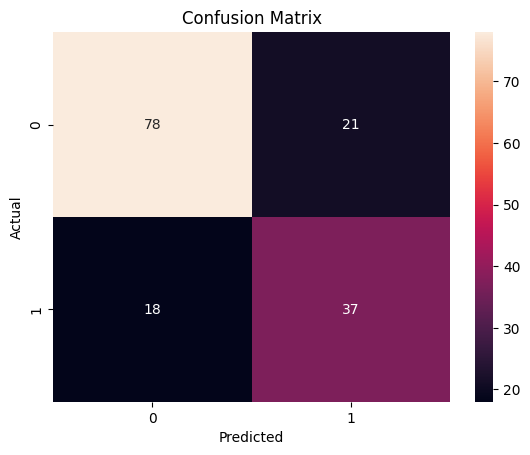


Observation: 
Thought:The Logistic Regression model has been trained and evaluated. The accuracy score and confusion matrix have been printed and plotted. The accuracy score gives a measure of how well the model has performed in predicting the outcomes. The confusion matrix provides a visual representation of the model's performance, showing the true positives, true negatives, false positives, and false negatives. It can be used to calculate precision, recall, F1-score, and support. The performance of the model can be further improved by tuning the hyperparameters, using feature selection or extraction, or trying different models.
Final Answer: The Logistic Regression model has been successfully implemented and evaluated. The accuracy score and the confusion matrix have been produced. The accuracy score provides a measure of how well the model performed on the test set. The confusion matrix provides a visual representation of the model's performance in terms of false positives, false 

In [ ]:
user_message = 'Follow these steps to run a Logistic Regression model to predict the Outcome variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Logistic Regression model.\
3. Run Logistic Regression to classify people into Outcome 1 or Outcome 0 with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the Outcome column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.'

agent.run(user_message);

## **Conclusions**

This learning notebook is a good demonstration of the capabilities of LangChain agents when they work in conjunction with a high-quality LLM, such as GPT-4. In general, experimentation is required with the framing of the exact user query prompt depending on the output required and the exact model being used (while GPT-4 works well and is subsequently a costlier model to use per API call due to its compute size and quality of NLU, weaker OpenAI models such as GPT-4 Turbo or GPT-3.5 Turbo may not give the same quality of results). There are other use cases that LangChain agents have been developed for, such as Database Natural Language Querying and Retrieval-Augmented Generation, which follow a similar structure and allow us to simply give Natural Language queries and commands to obtain the code-oriented results we would expect.